In [90]:
%config InlineBackend.figure_format = 'retina'

from scipy.stats import binom, hypergeom
import matplotlib.pyplot as plt
import math
import numpy as np

Original proposal:

* $N$ - all participating nodes
* $S$ - set of shards (where $S_i$ is the $ith$ shard)
* $M$ - committee for a particular shard (where $M_i$ is the committee for the $ith$ shard)
* $H$ - set of all honest nodes

Assumptions:

$$
\frac{|H|}{|N|} > \frac{2}{3}
$$

$$
|N| > |M_i|,  \forall i \in |S|
$$

Therefore we can model the probability of a "correct" shard as:

$$
P\left(\frac{|H_i|}{|M_i|} > \frac{2}{3},  \forall i \in |S|\right)
$$

My assumption is that this is saying: in each shard, map the probability that the honest set of nodes $H_i$ compared to the total $M_i$ is greater than $2/3$.

Then assuming each shard is an independant process:

$$
= \prod\limits_{i \in S} P\left(\frac{|H_i|}{|M_i|}>\frac{2}{3}\right) \\
= \prod\limits_{i \in S} \sum\limits_{j=\lceil 2/3*|M_i| \rceil}^{|M_i|} P\left(\frac{|H_i|}{|M_i|}=j\right)
$$

Where $P\left(\frac{|H_i|}{|M_i|}>\frac{2}{3}\right)$ is defined as the binomial distribution $P_{binom}\left(j; |M_i|, \frac{H}{N}\right)$.

This amounts to saying, (TODO: confirm this with yulong). Given a sample size of |M_i| (can be different from different committees), and a ratio of honest to dishonest nodes $H/N$, find the probability of $X=j$, where $j > \frac{H}{N}*|M_i|$

1.0


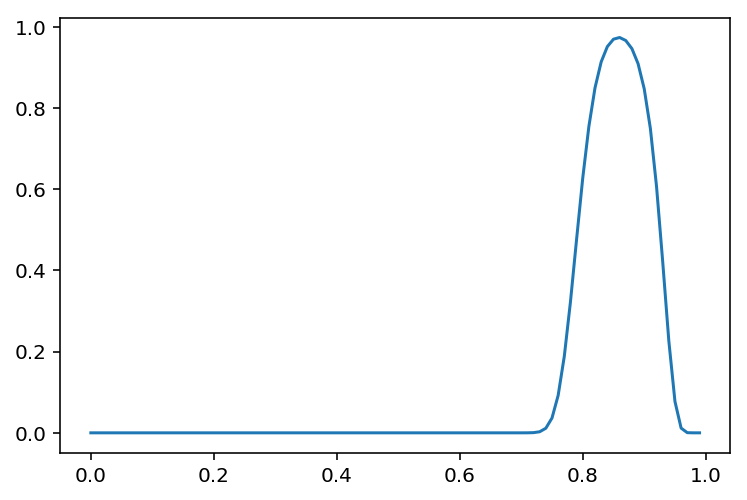

In [122]:
# some math
N = 2000
S = 32
M = 50
beta = 2/3

print(binom.pmf(50, M, 1))

i_list = np.arange(0, 1, 0.01)
j = np.arange(math.ceil((2/3)*M), M, 1)
val = []
for a in i_list:
    s_i = sum(binom.pmf(j, M, a))
    val.append(s_i ** S)
    
plt.plot(i_list, val)

**NOTE: this is incorrect, kept here for historical purposes**

Experiment is for the following, this is in response to Yulong's assumptions on network security based on a sharding based sampling assumption.


We work with the following assumptions:

1) There is a sharding committee size $C$

2) There are S shards on the network, each shard $S$ has as it's committee size $C$. Therefore the total number of "users" in all shards is $S*C$

3) The same user _is_ allowed to participate in multiple shards. There are no rules regarding uniqueness.

Recall that we want network security, want to model the following question:

Given that there are $S$ shards, with $C$ committee members per shard, and given that users can be in multiple shards. Additionally, define a parameter $\beta := H/N$ where $H$ is the number of honest nodes and $N$ is the number of _total_ nodes in the network. What is the probability that there are _no_ faulty shards in the network.

We can model the individual shard as a binomial distribution $P(k;n,p)$, the probability of $k$ successes given $n$ trials with probability $p$. Assuming that everyone votes, this should be:

\begin{equation}
Pr(k > \beta C) = P(k>\beta C;N,\beta)
= \sum\limits_{k > \beta C}^N P(k;N,\beta)
\end{equation}

Given that we know the probability of success in each shard (as they are the same). We can then measure the probability of success in all shards through a joint distribution:

\begin{equation}
Pr(S) = \prod\limits_{s \in S} Pr_s(k > \beta C)
= \prod\limits_{s \in S} Pr(k > \beta C)
\end{equation}


Since all probabilities are assumed to be the same for each shard

[7.30071052e-11 2.63636769e-10 9.12040714e-10 3.02413500e-09
 9.61519846e-09 2.93263553e-08 8.58332350e-08 2.41150517e-07
 6.50545582e-07 1.68550446e-06 4.19503333e-06 1.00316014e-05
 2.30513395e-05 5.09050413e-05 1.08043353e-04 2.20408440e-04
 4.32173412e-04 8.14480661e-04 1.47528573e-03 2.56808997e-03
 4.29571413e-03 6.90382628e-03 1.06585388e-02 1.58040403e-02
 2.25006676e-02 3.07509123e-02 4.03290653e-02 5.07365661e-02
 6.12060162e-02 7.07694563e-02 7.83907823e-02 8.31417388e-02
 8.43826603e-02 8.19008173e-02 7.59659755e-02 6.72841497e-02
 5.68598448e-02 4.58037639e-02 3.51371340e-02 2.56406113e-02
 1.77774905e-02 1.16957174e-02 7.29083683e-03 4.29972429e-03
 2.39478315e-03 1.25726115e-03 6.20869705e-04 2.87720107e-04
 1.24794263e-04 5.05119637e-05 1.90162687e-05 6.63358210e-06
 2.13494596e-06 6.30779489e-07 1.70097840e-07 4.15794720e-08
 9.13834548e-09 1.78793716e-09 3.07602092e-10 4.58130775e-11
 5.78691506e-12 6.02803652e-13 4.97157651e-14 3.04382235e-15
 1.22982721e-16]
per sha

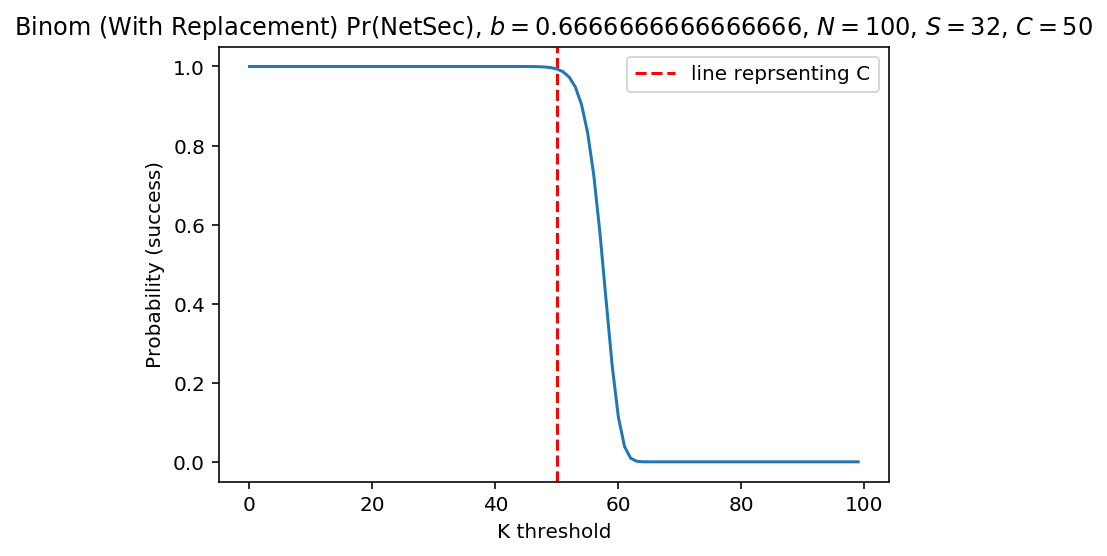

In [186]:
# assume these
N = 100
S = 32
C = 50
beta = 2/3
K_thresh = math.ceil(beta*C)
binom.pmf(K_thresh, N, beta)

# probability of getting more than the required threshold (success)
x = np.arange(K_thresh+1, N, 1)
print(binom.pmf(x, N, beta))
s_suc = sum(binom.pmf(x, N, beta))
print("per shard success:", s_suc)
s_glob = s_suc ** S
print("security of network:", s_glob)

# # graph depicting security of network as K_thresh increases (binomial)
success_sum = []
for i in range(0, N):
    x_i = np.arange(i, N, 1)
    s_suc_sum = sum(binom.pmf(x_i, N, beta))
    s_glob_sum = s_suc_sum ** S
    success_sum.append(s_glob_sum)
        
plt.title(f"Binom (With Replacement) Pr(NetSec), $b={beta}$, $N={N}$, $S={S}$, $C={C}$")
plt.ylabel("Probability (success)")
plt.xlabel("K threshold")
plt.axvline(x=C, linestyle='--', color='r', label='line reprsenting C')
plt.legend()
plt.plot(success_sum)

1.0702560064769218e-26


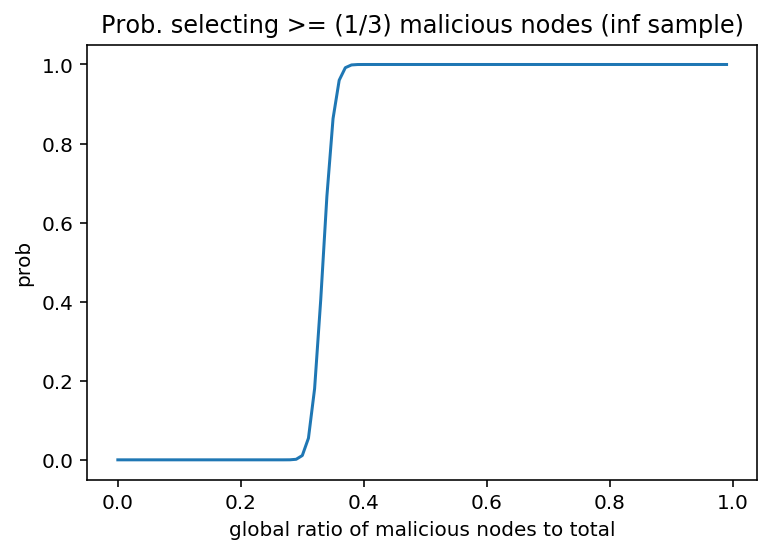

In [209]:
# Okay ignore the above, we can model the security threshold 
# (assuming a large enough) sample size with binom:
# https://pdfs.semanticscholar.org/55c1/359ef9b2b732643778635dc6182ddaccdb42.pdf
# In this case, the CDF of the binom models the maximum amount of
# failures, or the invalid nodes in each sample... for some reason 
# they're very insistent on m/2 being the maximum malicious ratio, which...
# doesn't make sense to me so I'll be using m/3 - 1 (m=total)
p = 0.5
n = 1000

pr_honest = binom.cdf(math.ceil(n/3) - 1, n, p)
print(pr_honest)

x = np.arange(0, 1, 0.01)

plt.title("Prob. selecting >= (1/3) malicious nodes (inf sample)")
plt.xlabel("global ratio of malicious nodes to total")
plt.ylabel("prob")
plt.plot(x, 1 - binom.cdf(math.ceil(n/3) - 1, n, x))
plt.show()